# Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('all_data.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
df

,Review,Label
0,น่าเกลียดมาก มาก บริการเป็น bitchy bitchy ห้อง...,Negative
1,ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...,Positive
2,ไม่ดีมากไม่สะอาดห้องขี้เกียจพนักงาน,Negative
3,ตลาดที่ดีและใกล้กับห้างสรรพสินค้า,Positive
4,นอนหลับได้ดีเพียงแค่ต้องการเข้าไปในตรอกและรถตุ...,Negative
...,...,...
2953,สถานที่ยุทธศาสตร์ใกล้กับ bts และช้อปปิ้ง,Positive
2954,ทำเลดีใกล้ bts,Positive
2955,โรงแรมสบาย ตำแหน่งที่ดีที่สุด ปลอดภัย,Positive
2956,บริการดีทำเลสะดวก,Positive


In [4]:
df['Label'].value_counts()

Positive    2005
Negative     953
Name: Label, dtype: int64

## ตัดคำ

In [5]:
from pythainlp.tokenize import word_tokenize

In [6]:
def tokenize(text):
    return word_tokenize(text,engine ='attacut', keep_whitespace=False)

In [7]:
df_tokened = df['Review'].apply(tokenize)

In [8]:
df_tokened

0       [น่า, เกลียด, มาก, มาก, บริการ, เป็น, bitchy, ...
1       [ใกล้, ตลาด, ประตู, น้ำ, หาก, คุณ, ต้องการ, ซื...
2       [ไม่, ดี, มาก, ไม่, สะอาด, ห้อง, ขี้, เกียจ, พ...
3       [ตลาด, ที่, ดี, และ, ใกล้, กับ, ห้าง, สรรพสินค้า]
4       [นอน, หลับ, ได้, ดี, เพียง, แค่, ต้องการ, เข้า...
                              ...                        
2953    [สถานที่, ยุทธศาสตร์, ใกล้, กับ, bts, และ, ช้อ...
2954                                [ทำเล, ดี, ใกล้, bts]
2955    [โรงแรม, สบาย, ตำแหน่ง, ที่, ดี, ที่สุด, ปลอด,...
2956                            [บริการ, ดี, ทำเล, สะดวก]
2957    [ห้อง, พัก, ของ, โรง, แรม, คับแคบ, ผนัง, ไม้, ...
Name: Review, Length: 2958, dtype: object

In [9]:
for i in range(10):
    print(df_tokened[i])

['น่า', 'เกลียด', 'มาก', 'มาก', 'บริการ', 'เป็น', 'bitchy', 'bitchy', 'ห้อง', 'ส่ง', 'กลิ่น', 'มี', 'แมลง', 'อยู่', 'ลูก', 'พี่ลูกน้อง', 'มี', 'โรค', 'หัวใจ', 'จนกระทั่ง', 'หายใจ', 'ถี่', 'ขอ', 'ให้', 'ย้าย', 'ไป', 'คืน', 'ที่', 'สอง', 'ก็', 'ไม่', 'ได้', 'รับ', 'แม้ว่า', 'จอง', 'คืน', 'เหตุผล', 'เต็ม', 'แม้', 'ว่า', 'จะ', 'ว่างเปล่า', 'แต่', 'หลาย', 'คน', 'เพิ่ง', 'จอง', 'ทารุณ ซาดิสม์', 'ไม่', 'มี', 'trolly', 'อยู่', 'ไม่', 'มี', 'พนักงาน', 'ยก', 'กระเป๋า', 'ที่', 'ยก', 'มัน', 'ขึ้น', 'มา', 'เตรียม', 'ตัว', 'ให้', 'พร้อม', 'ช้อปปิ้ง', 'มากมาย', 'เตรียม', 'พร้อม', 'ที่', 'จะ', 'นำ', 'ยก', 'ตัว', 'เอง', 'เมื่อ', 'อยู่', 'ที่', 'นี่', 'ไม่', 'มี', 'ครั้ง', 'อยู่', 'ที่', 'นี่', 'นุ่น', 'ของ', 'ต้นนุ่น', 'ไม่', 'แนะนำ', 'จริง']
['ใกล้', 'ตลาด', 'ประตู', 'น้ำ', 'หาก', 'คุณ', 'ต้องการ', 'ซื้อ', 'สินค้า', 'ใน', 'ตลาด', 'pretunam', 'เพียง', 'แค่', 'เดิน', 'นี่', 'เป็น', 'ครั้ง', 'ที่', 'สอง', 'ที่', 'เรา', 'มา', 'อยู่', 'ที่', 'นี่']
['ไม่', 'ดี', 'มาก', 'ไม่', 'สะอาด', 'ห้อง', 'ขี้', 'เกียจ

## TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.corpus import thai_stopwords

In [11]:
# Thai Stop Words
TH__stop = list(thai_stopwords())

In [12]:
TfidfVectorizer(stop_words = TH__stop, ngram_range=(1, 2), lowercase=True, max_features=150000)

TfidfVectorizer(max_features=150000, ngram_range=(1, 2),
                stop_words=['แยะ', 'จรด', 'ข้าฯ', 'ซะก่อน', 'จำ', 'เช่นก่อน',
                            'เขียน', 'เดียวกัน', 'กลับ', 'มากมาย', 'วันนี้',
                            'ดั่ง', 'จัง', 'เท่าใด', 'เชื่อมั่น', 'ทุกเมื่อ',
                            'เอา', 'ใครๆ', 'ตลอดศก', 'เพื่อที่', 'สุดๆ',
                            'แท้จริง', 'ทุกคน', 'คราที่', 'แต่ที่', 'กำลัง',
                            'ละ', 'แม้ว่า', 'ข้างล่าง', 'อย่างนั้น', ...])

In [13]:
def identity_fun(text):
    return text

tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_fun, #does no extra tokenizing
                                   preprocessor=identity_fun, #no extra preprocessor
                                   token_pattern=None)

In [14]:
tfidf_vector= tfidf_vectorizer.fit_transform(df_tokened)
features = tfidf_vectorizer.get_feature_names()
tfidf_array = np.array(tfidf_vector.todense())

df_features = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names())
df_features

C:\Users\FAIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,abang,abf,ac,accor,ai,aircond,airport,airportlink,aja,...,ไหล,ไหว,ไหว้,ไอ,ไอ้,ไฮเทคโนโลยี,•,•อิสระ,️,️มี
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
tfidf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Random OverSampling

In [16]:
from collections import Counter

In [17]:
#Over
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy= 1)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(tfidf_array, df['Label'])
# summarize class distribution
print(Counter(y_over))

Counter({'Negative': 2005, 'Positive': 2005})


In [18]:
y_over

0       Negative
1       Positive
2       Negative
3       Positive
4       Negative
          ...   
4005    Negative
4006    Negative
4007    Negative
4008    Negative
4009    Negative
Name: Label, Length: 4010, dtype: object

In [19]:
len(X_over)

4010

## Model

In [20]:
from sklearn.model_selection import train_test_split
X = X_over
ground_truth = y_over
X_train, X_test, y_train, y_test = train_test_split(X, ground_truth, test_size=0.3, random_state=101)

In [21]:
y_test.value_counts()

Negative    613
Positive    590
Name: Label, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.97      0.98      0.98       613
    Positive       0.98      0.97      0.97       590

    accuracy                           0.98      1203
   macro avg       0.98      0.97      0.98      1203
weighted avg       0.98      0.98      0.98      1203



In [25]:
y_test.value_counts()

Negative    613
Positive    590
Name: Label, dtype: int64

# Confusion Matrix

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Conf Matrix
from matplotlib import pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)

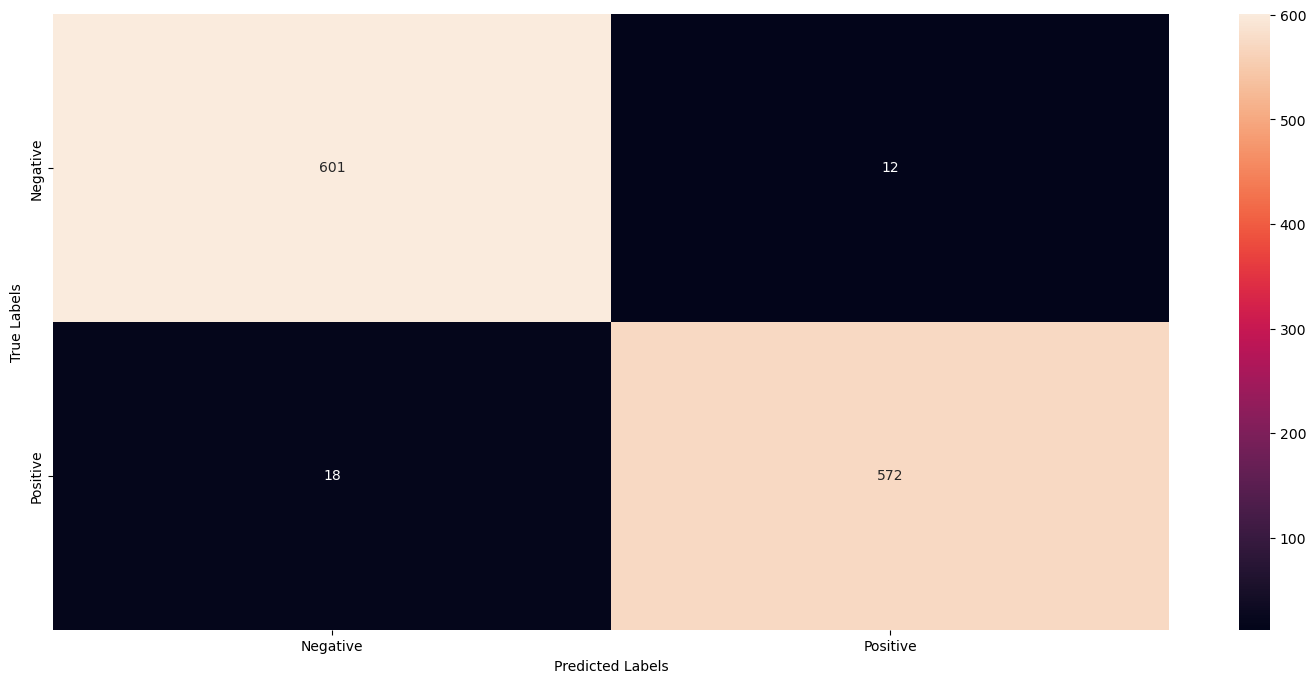

In [28]:
plt.figure(figsize = (18,8))
sns.heatmap(cf_matrix, annot = True,fmt='g', xticklabels = ('Negative','Positive'), yticklabels = ('Negative','Positive'))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Implement with Unseen Data**

## Import

In [29]:
import pandas as pd
import numpy as np

In [30]:
df_unseen = pd.read_csv('preprocessed_unseen_data.csv').drop(['Unnamed: 0', 'Rating'],axis=1)

In [31]:
df_unseen

,Review
0,มาพักเป็นครั้งที่ แล้วค่ะ ประทับใจตั้งแต่ทำเลข...
1,บริการดี ประทับใจ เดินทางสะดวกครับ ใกล้แหล่งขอ...
2,การบริการดีและห้องสวยงามห้องน้ำสะอาดมีที่จอดรถ...
3,ทำเลโรงแรมดีมากค่ะ ห้องกว้างห้องน้ำก็กว้างสมรา...
4,ห้องดีมากสะอาดห้องน้ำสะอาดแอร์เย็นฉ่ำพนักงานบร...
...,...
1168,จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...
1169,ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...
1170,น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...
1171,ห้องพักสะอาด


ตัดอักษรเรื่อยเปื่อย

In [32]:
import re
def remove_unvalue(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [33]:
def filter_contents(text):
    text_filtered = ''.join([i for i in text if not i.isdigit()])
    for i in ['...','..','.',"#","'","%","?","#","@","!","\xa0",'/','"',")","(","-","_",'“','”',"ๆ","'์","ฯลฯ","ฯ","&","<",">",".","+",":",'\n']:
        text_filtered = text_filtered.replace(i,"")
        text_filtered = text_filtered.replace(","," ")
    return text_filtered

In [34]:
#df_unseen['Review'] = df_unseen['Review'].apply(filter_contents)
#df_unseen['Review'] = df_unseen['Review'].apply(remove_unvalue)

In [35]:
df_unseen

,Review
0,มาพักเป็นครั้งที่ แล้วค่ะ ประทับใจตั้งแต่ทำเลข...
1,บริการดี ประทับใจ เดินทางสะดวกครับ ใกล้แหล่งขอ...
2,การบริการดีและห้องสวยงามห้องน้ำสะอาดมีที่จอดรถ...
3,ทำเลโรงแรมดีมากค่ะ ห้องกว้างห้องน้ำก็กว้างสมรา...
4,ห้องดีมากสะอาดห้องน้ำสะอาดแอร์เย็นฉ่ำพนักงานบร...
...,...
1168,จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...
1169,ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...
1170,น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...
1171,ห้องพักสะอาด


## ตัดคำ

In [38]:
df_tokened_unseen = df_unseen['Review'].apply(tokenize)

In [39]:
df_tokened_unseen

0       [มา, พัก, เป็น, ครั้ง, ที่, แล้ว, ค่ะ, ประทับใ...
1       [บริการ, ดี, ประทับใจ, เดินทาง, สะดวก, ครับ, ใ...
2       [การ, บริการ, ดี, และ, ห้อง, สวยงาม, ห้องน้ำ, ...
3       [ทำเล, โรง, แรม, ดี, มาก, ค่ะ, ห้อง, กว้าง, ห้...
4       [ห้อง, ดี, มาก, สะอาด, ห้องน้ำ, สะอาด, แอร์, เ...
                              ...                        
1168    [จอง, ไว้, สาม, ห้อง, เพราะ, เช้า, ต้อง, มี, ไ...
1169    [ทำเล, ดี, มาก, เดิน, ขึ้น, bts, ได้, เลย, ราค...
1170    [น, ตาม, ที่, แจ้ง, ว่า, สามารถ, เช็ค, อิน, ได...
1171                                   [ห้อง, พัก, สะอาด]
1172                      [อีก, เดือน, เจอ, กัน, นะ, ค่ะ]
Name: Review, Length: 1173, dtype: object

In [40]:
for i in range(10):
    print(df_tokened_unseen[i])

['มา', 'พัก', 'เป็น', 'ครั้ง', 'ที่', 'แล้ว', 'ค่ะ', 'ประทับใจ', 'ตั้งแต่', 'ทำเล', 'ของ', 'โรง', 'แรม', 'การ', 'บริการ', 'ห้อง', 'พัก', 'ความ', 'สะอาด']
['บริการ', 'ดี', 'ประทับใจ', 'เดินทาง', 'สะดวก', 'ครับ', 'ใกล้', 'แหล่ง', 'ของ', 'กิน', 'ใกล้', 'รถไฟฟ้า', 'มา', 'พัก', 'ครั้ง', 'แล้ว']
['การ', 'บริการ', 'ดี', 'และ', 'ห้อง', 'สวยงาม', 'ห้องน้ำ', 'สะอาด', 'มี', 'ที่', 'จอด', 'รถ', 'ใต้', 'ดิน', 'สอง', 'ชั้น']
['ทำเล', 'โรง', 'แรม', 'ดี', 'มาก', 'ค่ะ', 'ห้อง', 'กว้าง', 'ห้องน้ำ', 'ก็', 'กว้างสมราคา', 'ทาง', 'เดิน', 'ห้อง', 'อาจ', 'จะ', 'มืด', 'ไป', 'หน่อย', 'แต่', 'ภาย', 'ใน', 'ห้อง', 'สวย', 'ค่ะ', 'ไม่', 'ได้', 'แย่', 'เลย', 'พนักงาน', 'บริการ', 'ดี', 'พูดจา', 'เพราะ', 'ไม่', 'เหวี่ยง', 'ไป', 'ไหน', 'สะดวก', 'มา', 'คน', 'เดียว', 'ก็', 'ไม่', 'น่า', 'กลัว', 'ค่ะ', 'ใกล้', 'สถานที่', 'คาเฟ่', 'ร้าน', 'อาหาร', 'ต่าง', 'ติด', 'ตรง', 'เข้า', 'พัก', 'คืน', 'แรก', 'ที่', 'นอน', 'มี', 'ฝุ่น', 'นิดหน่อย', 'เหมือน', 'ไม่', 'ได้', 'ใช้', 'งาน', 'แต่', 'คืน', 'ต่อ', 'ไป', 'แม่บ้าน', 'ทำ', 'ความ'

## TF-IDF

In [43]:
tfidf_vector_unseen = tfidf_vectorizer.fit_transform(df_tokened_unseen)
features_unseen = tfidf_vectorizer.get_feature_names()
tfidf_array_unseen = np.array(tfidf_vector_unseen.todense())

df_features_unseen = pd.DataFrame(tfidf_array_unseen,columns=tfidf_vectorizer.get_feature_names())
df_features_unseen

C:\Users\FAIR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,abloom,activates,agoda,airport,and,areas,arl,asia,bangkok,...,ไอบิส,ไฮซี,…,️,️️️️️️️,️️️️️️️️️,️️️️️️️️️️️️️️️️️️️️️️,￼,🇨,🇳
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
tfidf_array_unseen

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

ปรับ จำนวน feature ของ tfidf_array_unseen ให้เท่ากับ lr model

In [45]:
not_existing_cols = [c for c in df_features.columns.tolist() if c not in df_features_unseen]
# add this columns to the data frame
df_features_unseen = df_features_unseen.reindex(df_features_unseen.columns.tolist() + not_existing_cols, axis=1)
# new columns dont have values, replace null by 0
df_features_unseen.fillna(0, inplace = True)
# use the original X structure as mask for the new inference dataframe
df_features_unseen = df_features_unseen[df_features.columns.tolist()]

In [46]:
df_features_unseen

,a,abang,abf,ac,accor,ai,aircond,airport,airportlink,aja,...,ไหล,ไหว,ไหว้,ไอ,ไอ้,ไฮเทคโนโลยี,•,•อิสระ,️,️มี
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Use with model**

In [47]:
y_pred_unseen = lr.predict(df_features_unseen)

C:\Users\FAIR\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [48]:
new_series = pd.Series(y_pred_unseen)

In [49]:
df_unseen = pd.concat(([df_unseen,new_series]) , axis=1)

In [50]:
df_unseen = df_unseen.set_axis(['Review','Label'], axis=1)
df_unseen


,Review,Label
0,มาพักเป็นครั้งที่ แล้วค่ะ ประทับใจตั้งแต่ทำเลข...,Positive
1,บริการดี ประทับใจ เดินทางสะดวกครับ ใกล้แหล่งขอ...,Positive
2,การบริการดีและห้องสวยงามห้องน้ำสะอาดมีที่จอดรถ...,Positive
3,ทำเลโรงแรมดีมากค่ะ ห้องกว้างห้องน้ำก็กว้างสมรา...,Negative
4,ห้องดีมากสะอาดห้องน้ำสะอาดแอร์เย็นฉ่ำพนักงานบร...,Positive
...,...,...
1168,จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...,Negative
1169,ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...,Positive
1170,น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...,Negative
1171,ห้องพักสะอาด,Positive


In [51]:
df_unseen['Label'].value_counts()

Positive    829
Negative    344
Name: Label, dtype: int64

**Merge All Data**

In [52]:
df_all = pd.concat([df,df_unseen]).reset_index().drop('index',axis=1)
df_all

,Review,Label
0,น่าเกลียดมาก มาก บริการเป็น bitchy bitchy ห้อง...,Negative
1,ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...,Positive
2,ไม่ดีมากไม่สะอาดห้องขี้เกียจพนักงาน,Negative
3,ตลาดที่ดีและใกล้กับห้างสรรพสินค้า,Positive
4,นอนหลับได้ดีเพียงแค่ต้องการเข้าไปในตรอกและรถตุ...,Negative
...,...,...
4126,จองไว้สามห้อง เพราะเช้าต้องมีไปทำธุระแถวสยาม ก...,Negative
4127,ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...,Positive
4128,น ตามที่แจ้งว่าสามารถเช็คอินได้ แต่เมื่อไปถึง ...,Negative
4129,ห้องพักสะอาด,Positive


In [53]:
df_all['Label'].value_counts()

Positive    2834
Negative    1297
Name: Label, dtype: int64

แยก ข้อมูลออกตาม class เพื่อใช้ในการวิเคราะห์ขั้นต่อไป

In [54]:
neg_class = df_all.drop(df_all[df_all['Label'] == 'Positive'].index)
pos_class = df_all.drop(df_all[df_all['Label'] == 'Negative'].index)

In [55]:
neg_class = neg_class.reset_index().drop(['index'],axis=1)
pos_class = pos_class.reset_index().drop(['index'],axis=1)

In [56]:
pos_class

,Review,Label
0,ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...,Positive
1,ตลาดที่ดีและใกล้กับห้างสรรพสินค้า,Positive
2,การบริการที่ดีใกล้กับตลาดและตลาดประตูน้ำประตูน...,Positive
3,โรงแรมสะอาดแผนที่ไม่เคยหายไป ผู้เป็นที่รักน่ารัก,Positive
4,นับเป็นครั้งที่เจ็ดในการเข้าพักที่โรงแรมสยามสต...,Positive
...,...,...
2829,เดินทางสะดวก ปลอดภัย,Positive
2830,ปลั๊กน้อยไปหน่อย นอกนั้นดีมาก ทำเลดีมาก,Positive
2831,ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...,Positive
2832,ห้องพักสะอาด,Positive


# Apriori

In [57]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# INSTALL
#pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS 
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

**Transform Data**

Tokenize and Create Bag-of-Words (BoW)


In [58]:
#print('ssss'sdsaadw)

SyntaxError: invalid syntax (2219168521.py, line 1)

In [84]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final,engine ='attacut', keep_whitespace=False)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final

In [59]:
pos_class['Review_token'] = pos_class['Review'].apply(tokenize)

In [74]:
pos_class

,Review,Label,Review_token
0,ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...,Positive,"[ใกล้, ตลาด, ประตู, น้ำ, หาก, คุณ, ต้องการ, ซื..."
1,ตลาดที่ดีและใกล้กับห้างสรรพสินค้า,Positive,"[ตลาด, ที่, ดี, และ, ใกล้, กับ, ห้าง, สรรพสินค้า]"
2,การบริการที่ดีใกล้กับตลาดและตลาดประตูน้ำประตูน...,Positive,"[การ, บริการ, ที่, ดี, ใกล้, กับ, ตลาด, และ, ต..."
3,โรงแรมสะอาดแผนที่ไม่เคยหายไป ผู้เป็นที่รักน่ารัก,Positive,"[โรง, แรม, สะอาด, แผนที่, ไม่, เคย, หาย, ไป, ผ..."
4,นับเป็นครั้งที่เจ็ดในการเข้าพักที่โรงแรมสยามสต...,Positive,"[นับ, เป็น, ครั้ง, ที่, เจ็ด, ใน, การ, เข้า, พ..."
...,...,...,...
2829,เดินทางสะดวก ปลอดภัย,Positive,"[เดินทาง, สะดวก, ปลอด, ภัย]"
2830,ปลั๊กน้อยไปหน่อย นอกนั้นดีมาก ทำเลดีมาก,Positive,"[ปลั๊ก, น้อย, ไป, หน่อย, นอก, นั้น, ดี, มาก, ท..."
2831,ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...,Positive,"[ทำเล, ดี, มาก, เดิน, ขึ้น, bts, ได้, เลย, ราค..."
2832,ห้องพักสะอาด,Positive,"[ห้อง, พัก, สะอาด]"


In [82]:
pop_class_token = pos_class.drop(['Label'],axis=1)
pop_class_token

,Review,Review_token
0,ใกล้ตลาดประตูน้ำ หากคุณต้องการซื้อสินค้าในตลาด...,"[ใกล้, ตลาด, ประตู, น้ำ, หาก, คุณ, ต้องการ, ซื..."
1,ตลาดที่ดีและใกล้กับห้างสรรพสินค้า,"[ตลาด, ที่, ดี, และ, ใกล้, กับ, ห้าง, สรรพสินค้า]"
2,การบริการที่ดีใกล้กับตลาดและตลาดประตูน้ำประตูน...,"[การ, บริการ, ที่, ดี, ใกล้, กับ, ตลาด, และ, ต..."
3,โรงแรมสะอาดแผนที่ไม่เคยหายไป ผู้เป็นที่รักน่ารัก,"[โรง, แรม, สะอาด, แผนที่, ไม่, เคย, หาย, ไป, ผ..."
4,นับเป็นครั้งที่เจ็ดในการเข้าพักที่โรงแรมสยามสต...,"[นับ, เป็น, ครั้ง, ที่, เจ็ด, ใน, การ, เข้า, พ..."
...,...,...
2829,เดินทางสะดวก ปลอดภัย,"[เดินทาง, สะดวก, ปลอด, ภัย]"
2830,ปลั๊กน้อยไปหน่อย นอกนั้นดีมาก ทำเลดีมาก,"[ปลั๊ก, น้อย, ไป, หน่อย, นอก, นั้น, ดี, มาก, ท..."
2831,ทำเลดีมาก เดินขึ้น bts ได้เลย ราคาค่อนข้างถูก ...,"[ทำเล, ดี, มาก, เดิน, ขึ้น, bts, ได้, เลย, ราค..."
2832,ห้องพักสะอาด,"[ห้อง, พัก, สะอาด]"


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))

cvec.fit_transform(pop_class_token['Review_token'])
cvec.vocabulary_

AttributeError: 'list' object has no attribute 'split'

In [76]:
df_pos_class_features = pd.DataFrame(pos_class_features.toarray(), columns=vectorizer.get_feature_names(), index=pos_class['Review_token'])
df_pos_class_features

NameError: name 'pos_class_features' is not defined

**Apply with Apriori (Pattern)**

In [ ]:
pip install apyori

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [ ]:
association_rules = apriori(pos_class['Review_token'], min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [ ]:
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])

# Word Cloud

# **เก็บไว้ก่อน**

In [ ]:
y_test.value_counts()

In [ ]:
test_predictions = pd.Series(test_predictions)
test_predictions.value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,test_predictions)
cm

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, test_predictions), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()